Benin Random Forest 10km Grid

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
import csv
#import seaborn
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [3]:
import random

random.seed(23)

Load in school counts data with other data and make indicator

In [4]:
grid_data = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/Africa/School_Counts/Gridded_10km_Data/BEN_Grid_Data_10km_ghsl.csv")

df = grid_data.dropna()

df.head()

df['SCHOOLS'] = [int(i>0) for i in df['NUMPOINTS']]

print(df['SCHOOLS'])

df.head()


0       1
1       0
2       0
3       0
4       0
       ..
1112    1
1113    1
1114    1
1115    1
1116    1
Name: SCHOOLS, Length: 1117, dtype: int64


,Unnamed: 0,x,y,land,built_s,built_v,NUMPOINTS,pop,smod_10,smod_11,smod_12,smod_13,smod_21,smod_22,smod_23,smod_30,id,country,SCHOOLS
0,1,279000,1519000,1000000.00,918.01,2296.19,1,2754.751976,0,91,8,1,0,0,0,0,1,1,1
1,2,249000,1509000,997028.34,4.84,12.14,0,14.602684,0,100,0,0,0,0,0,0,2,1,0
2,3,259000,1509000,999813.00,1.82,4.55,0,5.467709,0,100,0,0,0,0,0,0,3,1,0
3,4,269000,1509000,999934.74,0.20,0.50,0,0.600847,0,100,0,0,0,0,0,0,4,1,0
4,5,279000,1509000,1000000.00,140.01,350.33,0,419.956108,0,99,1,0,0,0,0,0,5,1,0


Make test and train sets

In [16]:
train, test = train_test_split(df, test_size = .25, random_state = 42)

print(train.head())

train_y = train['SCHOOLS']
train_x = train[['built_v', 'built_s', 'pop', 'smod_11', 'y', 'smod_12', 'x']]
test_y = test['SCHOOLS']
test_x = test[['built_v', 'built_s', 'pop', 'smod_11', 'y', 'smod_12', 'x']]
print(train_y.head())
print(train_x.head())

     Unnamed: 0       x        y        land  built_s   built_v  NUMPOINTS  \
361         362  249000  1309000   998331.54  1737.64   7461.79          0   
790         791  199000  1089000   999082.12     3.18      7.99          0   
533         534  139000  1239000   998464.07  4800.59  12037.35          8   
708         709  149000  1149000  1000000.00  3541.56   8867.03          2   
583         584  199000  1219000  1000000.00   540.68   1353.81          0   

             pop  smod_10  smod_11  smod_12  smod_13  smod_21  smod_22  \
361  3123.296774        0       98        1        1        0        0   
790     3.796240        0      100        0        0        0        0   
533  4891.346790        0       72       28        0        0        0   
708  4212.937485        0       80       18        2        0        0   
583   463.561106        0      100        0        0        0        0   

     smod_23  smod_30   id  country  SCHOOLS  
361        0        0  362        1    

Load model

Make data and model for probability

In [21]:
test_y2 = test_y.to_numpy()

rf4 = RandomForestClassifier(max_depth=110, max_features=4, min_samples_leaf=4,
                             min_samples_split=20, n_estimators=300)
rf_model4 = rf4.fit(train_x, train_y)

pred_model4= rf_model4.predict(test_x)

Predict probability

In [43]:
pred_model_prob = rf_model4.predict_proba(test_x)

ndarray
ndarray
ndarray
     SCHOOLS  Prob_SCHOOLS
0        1.0      1.000000
1        1.0      0.997151
2        0.0      0.708863
3        0.0      0.787490
4        1.0      1.000000
..       ...           ...
275      0.0      0.124891
276      0.0      0.005792
277      1.0      0.512026
278      0.0      0.098443
279      0.0      0.009884

[280 rows x 2 columns]


Predict on all

In [54]:
x = df[['built_v', 'built_s', 'pop', 'smod_11', 'y', 'smod_12', 'x']]
y = df['SCHOOLS']

y2 = y.to_numpy()

rf_all = RandomForestClassifier(max_depth=110, max_features=4, min_samples_leaf=4,
                             min_samples_split=20, n_estimators=300)
rf_model_all = rf_all.fit(x,y)

pred_model_prob = rf_model_all.predict_proba(x)

y_pred = pred_model_prob[:,1]

print(y_pred.__class__.__name__)
print(y2.__class__.__name__)

y_out = numpy.column_stack([y2, y_pred])
print(y_out.__class__.__name__)

y_data = pandas.DataFrame(y_out, columns = ['SCHOOLS', 'Prob_SCHOOLS'])
print(y_data)

data = y_data.join(x)
print(data)

ndarray
ndarray
ndarray
      SCHOOLS  Prob_SCHOOLS
0         1.0      0.571742
1         0.0      0.001519
2         0.0      0.002778
3         0.0      0.002778
4         0.0      0.030241
...       ...           ...
1112      1.0      1.000000
1113      1.0      1.000000
1114      1.0      0.995916
1115      1.0      0.995916
1116      1.0      1.000000

[1117 rows x 2 columns]
      SCHOOLS  Prob_SCHOOLS     built_v    built_s            pop  smod_11  \
0         1.0      0.571742     2296.19     918.01    2754.751976       91   
1         0.0      0.001519       12.14       4.84      14.602684      100   
2         0.0      0.002778        4.55       1.82       5.467709      100   
3         0.0      0.002778        0.50       0.20       0.600847      100   
4         0.0      0.030241      350.33     140.01     419.956108       99   
...       ...           ...         ...        ...            ...      ...   
1112      1.0      1.000000   688198.29  106190.65  217290.131216    

           x        y  Prob_SCHOOLS
0     279000  1519000      0.571742
1     249000  1509000      0.001519
2     259000  1509000      0.002778
3     269000  1509000      0.002778
4     279000  1509000      0.030241
...      ...      ...           ...
1112  219000   789000      1.000000
1113  229000   789000      1.000000
1114  239000   789000      0.995916
1115  249000   789000      0.995916
1116  259000   789000      1.000000

[1117 rows x 3 columns]
x        89000   99000   109000  119000  129000  139000  149000  159000  \
y                                                                         
789000      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
799000      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
809000      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
819000      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
829000      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...   

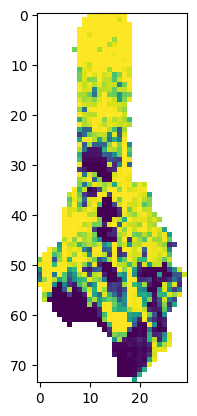

In [67]:
xyz = data[['x', 'y', 'Prob_SCHOOLS']]
print(xyz)

xyz_wide = xyz.pivot(index = 'y', columns = 'x', values = 'Prob_SCHOOLS')
print(xyz_wide)

plt.imshow(xyz_wide, interpolation='nearest')
plt.show()